# Introduction to Linear Regression
Linear regression is a supervised learning algorithm. Given a single feature, a line is fit that best predicts the independent variable. When many features are involved, a hyperplane is fit that minimizes the error between predicted values and the ground truth. Given an input vector Xn = (X1, X2, ..., Xn) that we want to use to predict the output y, the regression equation is given by:

$$y=\beta_0 + \sum_{i=1}^nX_i\beta_i$$


$$y=m X + c$$

As you can see below, the line that minimized the Mean Squared Distance (MSE) is the best fit. Linear Regression is a statistical technique to determine that line.

<img src="../images/linear_regression.png", style="width: 700px;"> 

Regression can also involve fitting polynomials as shown below:

<img src="../images/curve_fitting.png", style="width: 700px;"> 

The errors are reduced by minimizing the error squared, where error is the difference between predicted values and the target values. The linear regression course is organized as:
- Study of Boston Housing Price dataset.
- EDA - Scatter plots, joint plots
- Categorical variables
- Regression using Statsmodels
- Improving the fit 
  - R-squared
  - P-values
  - Multi-collinearity
- Regression using Scikit-Learn
- Lasso 
- Ridge
- Cross-Validation 


# Instructions

Boston dataset can be loaded from the datasets in Scikit-Learn with the command load_boston(). To work with linear regression datasets, we need the libraries numpy, pandas and seaborn. For modeling, we would need statsmodels or sklearn. sklearn has datasets property which facilitates easy loading of popular datasets such as the Boston Housing price dataset. You can use the load_boston() function to load the datasets. The features are available in feature_names list. We can feed this data into a dataframe to use statsmodels or sklearn for regression modeling. 


- Slice the top 10 rows of the boston_data dataframe and assign it to boston_sample



In [81]:
%matplotlib inline
from sklearn import datasets
from matplotlib import rcParams

import numpy as np
import pandas as pd
import seaborn as sns

#Set graph fonts
rcParams['font.family'] = 'DejaVu Sans'

#load boston dataset using boston_dataset.feature_names
boston_dataset = datasets.load_boston()
boston_data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)


<p>use .head() to list the top rows</p>

In [82]:
#Load the 10 rows using head function
boston_sample = boston_data.head(10)
boston_sample

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


<br/><br/><br/><br/>

# Boston Housing Dataset - EDA

The data and target are present as properties in boston data. Statsmodels is a library used popularly for linear regression. Boston data is present as independent variables in data and the housing rate as MEDV in target property. Also feature names are listed in feature_names. The desription is available in UCI Machine Learning repository website. 

<br/><center>Boston Housing Dataset</center>

| CRIM  | per capita crime rate by town                                         |
|-------|-----------------------------------------------------------------------|
| ZN    | proportion of residential land zoned for lots over 25,000 sq.ft.      |
| INDUS | proportionof non-retail business acres per town                       |
| CHAS  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |

Here are the full list of variables:

There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

Reference: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

The task is to model the median value of owner-occupied homes given all the factors. Some factors could affect the housing value and some may not. 

<br/>
# Scatter Plots or Joint plots using seaborn

To visualize how each factor would affect housing rate, we can run a scatter plot of the housing rate for each dependent variable. This will help visualize how the target vector may be affected by each factor. Later we shall study quantitave methods that can provide us methods to measure how each factor affects the output or if it doesnt affect the output at all.

g = sns.jointplot("MEDV", "CRIM", data=df, xlim=(0, 60), ylim=(0, 12), color="r", size=7)

<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2016/11/25/figure_1_Ctunq42.png'></img>

From the above plot we can observe that the median value of the houses in Boston peaks at lowest crime rates which makes logical sense. This is one of the goals of EDA; to discover patterns in scatter plots and make sense of the input variables. The input variables are also called indepedent variables since they affect the value of the target variable, which is called the dependent variable.

#### Instructions

- Generate a joint plot of Boston house prices vs Lower status of the population and assign the plot to variable g as shown in the demo code below.
- What is your interpretation of the scatter plot?


In [83]:
# Add median house price MEDV to the dataframe from  boston_dataset.target

boston_data['MEDV'] = boston_dataset.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


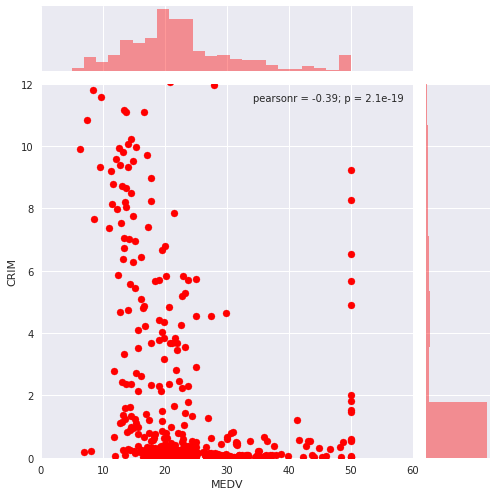

In [84]:

# Create a joint plot of  MEDV vs CRIM variables.
g = sns.jointplot("MEDV", "CRIM", data=boston_data, xlim=(0, 60), ylim=(0, 12), color="r", size=7)


<p>Look up the symbol for Lower status of the population.</p>

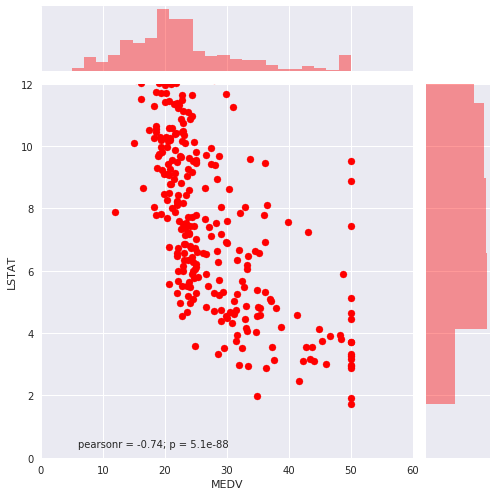

In [85]:
# Modify this to plot MEDV vs Lower status of the population.
g = sns.jointplot("MEDV", "LSTAT", data=boston_data, xlim=(0, 60), ylim=(0, 12), color="r", size=7)

<br/><br/><br/><br/><br/>



## Categorical Variables

We can now look at scatter plots of all input variables with seaborn:

<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2016/11/25/figure_2.png'/>

The above is helpful to visualize what factors might be significant. However, there are quantitative tests that we shall learn to verify our assumptions. 


# Categorical Variables 

In Fig. 2 the feature CHAS only takes two values 0.0 and 1.0. It is essentialy a boolean value as described in the table as well. Note that when descriptions are not available, we can still look at unique value of a feature or plot graphs to discover such occurences. This feature indicates Charles river proximity in a certain manner. Such variables that take boolean values or variables such as day of the week which can take a range of unique values are called as categorical variables. There are better plots to visualize such variables. While selecting categorical variables it is important that the fraction of unique values is relatively small compared to the total dataset. To visualize the categorical data, we can use stripplot:

```python
sns.stripplot(x="CHAS", y="MEDV", data=boston_data);
With seaborn, you can adjust the plots with the settings buttons at the bottom.
```

<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2016/11/25/figure_3.png'/>


The joint plots and scatter plots by default overlap the points and therefore to visualize density becomes a tough task, esp when such overlapping points are high in the map. To resolve this issue, you can set the flag called jitter to True which spreads high density of overlapping points. 


<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2016/11/25/figure_4.png'/>
 


### Instructions

To identify categorical variables, you can study the scatter plots to see a fixed set of limited values or can look up the unique values in the feature with the command:

```python
boston_data['CHAS'].unique()
array([ 0.,  1.])
```

- Identify the other categorical variable in the dataset and generate a stripplot against MEDV setting jitter to True.

In [86]:
# Find the categories of CHAS and RAD variables

boston_data.CHAS.unique()
boston_data['RAD'].unique()

array([  1.,   2.,   3.,   5.,   4.,   8.,   6.,   7.,  24.])

<p>Lookup the graph and print out the array of all the unique values. If the values are limited and much lesser than the total dataset size then it is a categorical variable. </p>

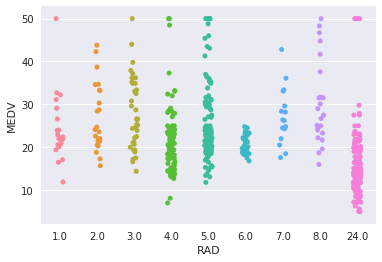

In [87]:
# generate a stripplot for RAD against MEDV setting jitter to True.
g = sns.stripplot(x="RAD", y="MEDV", data=boston_data, jitter=True)

<br/><br/><br/>
# Regression Using Statsmodels

Statsmodels is a library used widely for linear regression. The linear regression library has convenient ways to specify parameters for regression and hence is popularly used. The format to specify regression for a single variable is:

```python
lm = sm.ols(formula = 'y ~ x')
```
where x is a dependent variable. Let us look at how housing rate is affected by crime rate. 

```python
lm = sm.ols(formula='MEDV ~ CRIM', data=boston_data).fit()
```
This is called simple regression as only one variable affects the target variable. The above command trains the model lm with input as CRIM and target as MEDV. If many variables are involved in modeling the target, then it is called multiple linear regression. 

To get prediction from the trained model:

```python
y_hat = lm.predict(boston_data[['CRIM']])
```
<br/>

## Parameters of Linear Regression

The main parameters of linear regression are the intecept and the coefficients. Print out the main parameters with the command:

lm.params

Intercept    24.016220
CRIM         -0.412775
dtype: float64

The coeffecient of CRIM shows the value by which housing rate changes for every unit increase in crime rate. Since it is negative, we can interpret that for every unit incrase in crime rate, the housing rate declines by -0.412775. 

The most important parameter to look for is the mean squared error, which tells us how good the predictions matched the ground truth or the target variable.

```python
print("MSE:", mean_squared_error(boston_data['MEDV'].values, y_hat))
MSE: 71.8523466653
```
<br/>

### Instructions

- Build a model of Housing price for input as average number of rooms per dwelling.
- Run prediction on the trained model. Assign the predictions to y_hat.
- What is the MSE? Assign the mean squared error to mse_lm

In [88]:
# Import statsmodel library using statsmodels.formula.api.
import statsmodels.formula.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error


In [89]:
# incorporate average number of rooms per dwelling RM as an input to statsmodel OLS function. 
#Fit the model with boston_data dataframe and print the summary

lm = sm.ols(formula='MEDV ~ RM', data=boston_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 05 Apr 2018   Prob (F-statistic):           2.49e-74
Time:                        13:27:21   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# Make prediction of MEDV by passing RM column from train dataset. Print Mean Squared Error - MSE

y_hat = lm.predict(boston_data[['RM']])
mse_lm = mean_squared_error(y_hat, boston_data[['MEDV']])
print("MSE:", mean_squared_error(y_hat, boston_data[['MEDV']]))

MSE: 43.6005517712



<br/><br/><br/>
# Improving the Fit - R-squared & Feature Engineering

'Improving the fit' or 'Fine tuning the model' are popular terms amongst data scientists. These terms refer to manipulating various parameters of linear regression model inputs as well as certain practices that enhance the predictions. We shall now study various such steps that are involved in improving the fit, thereby reducing the MSE.

There are other output parameters of linear regression that can be seen with the command:

lm.summary()
<div style='margin-top: -80px;'>
<table class="simpletable" style='float: left;'>
<caption>OLS Regression Results</caption>
<tbody><tr>
  <th>Dep. Variable:</th>          <td>MEDV</td>       <th>  R-squared:         </th> <td>   0.484</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.483</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   471.8</td>
</tr>
<tr>
  <th>Date:</th>             <td>Fri, 09 Jun 2017</td> <th>  Prob (F-statistic):</th> <td>2.49e-74</td>
</tr>
<tr>
  <th>Time:</th>                 <td>01:26:36</td>     <th>  Log-Likelihood:    </th> <td> -1673.1</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   506</td>      <th>  AIC:               </th> <td>   3350.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   504</td>      <th>  BIC:               </th> <td>   3359.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>     1</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</tbody></table>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<table class="simpletable" style='float: left;'>
<tbody><tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P&gt;|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Intercept</th> <td>  -34.6706</td> <td>    2.650</td> <td>  -13.084</td> <td> 0.000</td> <td>  -39.877</td> <td>  -29.465</td>
</tr>
<tr>
  <th>RM</th>        <td>    9.1021</td> <td>    0.419</td> <td>   21.722</td> <td> 0.000</td> <td>    8.279</td> <td>    9.925</td>
</tr>
</tbody></table>
<br/><br/><br/><br/><br/>
<table class="simpletable" style='float: left;'>
<tbody><tr>
  <th>Omnibus:</th>       <td>102.585</td> <th>  Durbin-Watson:     </th> <td>   0.684</td> 
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.000</td>  <th>  Jarque-Bera (JB):  </th> <td> 612.449</td> 
</tr>
<tr>
  <th>Skew:</th>          <td> 0.726</td>  <th>  Prob(JB):          </th> <td>1.02e-133</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 8.190</td>  <th>  Cond. No.          </th> <td>    58.4</td> 
</tr>
</tbody></table>
<br/><br/><br/><br/><br/><br/><br/><br/>
</div>
Amongst the various parameters in the above summary, the interesting ones we should study are R-squared and the coefficients. 

<br/>
## R-squared:

R-squared is a value between 0 and 1.0 to measure how well the dependent variables are effectively modeling the target variable. The higher the value, the better that the dependent variables explain the fit. Here we see that the R-squared is a low value closer to 0.0 which shows that the RM value alone is not a good indicator of the housing rate. To increase the R-squared value and get better fit or predictions, the best way is to increase the number of independent variables (also called Feature Engineering)

<br/>
### Instructions
Consider another variable, CRIM to fit the regression model.

- What is the new R-squared? Assign R-squared to a variable r_squared and print it out.
- What is the value of MSE? Assign MSE to mse_lm and print it out.

In [91]:
# Modify the code to add CRIM along with RM to the regression model.
lm = sm.ols(formula = 'MEDV ~ CRIM + RM', data=boston_data).fit()

<p>The method to add dependent variables is to use + sign. </p>

In [92]:
# Make prediction using the new model by passing CRIM and RM columns to the regression model.
#Print the new MSE and R Squared value based on updated model - has it improved the model with better results?

y_hat = lm.predict(boston_data[['CRIM', 'RM']])
mse_lm = mean_squared_error(boston_data['MEDV'].values, y_hat)
r_squared = lm.rsquared
print("MSE:", mse_lm, "R-Squared: ", r_squared)

MSE: 38.7888964105 R-Squared:  0.540522383951



<br/><br/><br/>
# Improving the fit - P-values
We saw previously that R-squared increased to 0.541(closer to 1.0 than previous value) which shows that the two variables together can model the house prices in Boston much better than just one variable, CRIM. Hence, we can choose to add all the variables to improve the fit:

Including all the variables, 

```python
lm = sm.ols(formula = 'MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD +     
                       TAX + PTRATIO + B + LSTAT', data=boston_data).fit()
```

Predicting over the features:


```python
y_hat = lm.predict(boston_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                                'LSTAT']])
print("MSE:", mean_squared_error(boston_data['MEDV'].values, y_hat))      
MSE: 21.8977792177
```

Note that the + sign between the input features in the above commands doesn't mean the variable are added but rather is used as a separator to specify various input features that are used in the modeling. The Mean Squared Error (MSE) reduced considerably which shows that the fit was better.

lm.summary()
<div style='margin-top: -70px'>
<table class="simpletable" style='float: left'>
<caption>OLS Regression Results</caption>
<tbody><tr>
  <th>Dep. Variable:</th>          <td>MEDV</td>       <th>  R-squared:         </th> <td>   0.541</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.539</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   295.9</td>
</tr>
<tr>
  <th>Date:</th>             <td>Fri, 09 Jun 2017</td> <th>  Prob (F-statistic):</th> <td>1.15e-85</td>
</tr>
<tr>
  <th>Time:</th>                 <td>01:38:17</td>     <th>  Log-Likelihood:    </th> <td> -1643.5</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   506</td>      <th>  AIC:               </th> <td>   3293.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   503</td>      <th>  BIC:               </th> <td>   3306.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>     2</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</tbody></table>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<table class="simpletable" style='float: left'>
<tbody><tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P&gt;|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Intercept</th> <td>  -29.3017</td> <td>    2.592</td> <td>  -11.303</td> <td> 0.000</td> <td>  -34.395</td> <td>  -24.208</td>
</tr>
<tr>
  <th>CRIM</th>      <td>   -0.2618</td> <td>    0.033</td> <td>   -7.899</td> <td> 0.000</td> <td>   -0.327</td> <td>   -0.197</td>
</tr>
<tr>
  <th>RM</th>        <td>    8.3975</td> <td>    0.406</td> <td>   20.706</td> <td> 0.000</td> <td>    7.601</td> <td>    9.194</td>
</tr>
</tbody></table>
<br/><br/><br/><br/><br/><br/><br/>
<table class="simpletable" style='float: left'>
<tbody><tr>
  <th>Omnibus:</th>       <td>170.471</td> <th>  Durbin-Watson:     </th> <td>   0.805</td> 
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.000</td>  <th>  Jarque-Bera (JB):  </th> <td>1034.461</td> 
</tr>
<tr>
  <th>Skew:</th>          <td> 1.331</td>  <th>  Prob(JB):          </th> <td>2.34e-225</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 9.479</td>  <th>  Cond. No.          </th> <td>    92.2</td> 
</tr>
</tbody></table>
</div>
<br/><br/><br/><br/><br/><br/><br/><br/>
The R-squared increased to 0.741 showing that including all the variables better fits the linear regression model and produces better results.


<br/>
## P-Values
p-values for each variable is an indicator of the significance of the latter in the modeling. Variables with p-values > 0.05 are considered insignificant. Such variables can be dropped from modeling the target variable.


<br/>
### Instructions
Looking at the summary of the model trained with all parameters below. Run the insignifiant variable and run regression again.

<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2017/03/22/Screen_Shot_2017-03-22_at_4.01.06_PM.png'/>

- Drop these variables from the fit and determine
  - MSE - Assign to variable mse_lm
  - R-squared - Assign to variable r_squared

In [93]:
# Now add all the variables from the train dataset and train the model using ols.
#Make prediction and Print the new MSE based on updated model's prediction on train dataset

lm = sm.ols(formula = 'MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=boston_data).fit()
y_hat = lm.predict(boston_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
print("MSE:", mean_squared_error(boston_data['MEDV'].values, y_hat))



MSE: 21.8977792177


In [94]:
#Print the linear model's parameters using lm.summary.
#Understand the p-values to identify irrelevant variables whose p-values > 0.05.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 05 Apr 2018   Prob (F-statistic):          6.95e-135
Time:                        13:27:31   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p>Drop variables whose p-values are greater than 0.05</p>

In [95]:
#Drop the variables identified in the previous step - AGE and INDUS
# Train the model with the updated list of variables and make prediction using train dataset
# Print the new Train MSE (Train dataset) and r-squared value
lm = sm.ols(formula = 'MEDV ~ CRIM + ZN  + CHAS + NOX + RM  + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=boston_data).fit()
y_hat = lm.predict(boston_data[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])

mse_lm = mean_squared_error(boston_data['MEDV'].values, y_hat)
r_squared = lm.rsquared
print("MSE:", mse_lm, "R-SQUARED:" , r_squared)
lm.summary()

MSE: 21.9030462229 R-SQUARED: 0.740545352046


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 05 Apr 2018   Prob (F-statistic):          5.74e-137
Time:                        13:27:33   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3694      5.069      7.176      0.000      26.411      46.328
CRIM          -0.1076      0.033     -3.296      0.001      -0.172      -0.043
ZN             0.0458      0.014      3.387      0.001       0.019       0.072
CHAS           2.7212      0.854      3.185      0.002       1.043       4.400
NOX          -17.3956      3.536     -4.920      0.000     -24.343     -10.448
RM             3.7966      0.406      9.343      0.000       2.998       4.595
DIS           -1.4934      0.186     -8.039      0.000      -1.858      -1.128
RAD            0.2991      0.063      4.719      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.488      0.001      -0.018      -0.005
PTRATIO       -0.9471      0.129     -7.337      0.000      -1.201      -0.693
B              0.0094      0.003      3.508      0.000       0.004       0.015
LSTAT         -0.5232      0.047    -11.037      0.000      -0.616      -0.430
==============================================================================
Omnibus:                      178.444   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.944
Skew:                           1.524   Prob(JB):                    1.31e-171
Kurtosis:                       8.295   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


<br/><br/><br/>
# Improving the fit - Multicollinearity
Many times, more than one input could be dependent on each other. In Linear Regression, the requirement is that all the input variables are independent of each other. When a feature is dependent on one or more of the other input features, it leads to a phenomenon known as multi-collinearity or correlation. This can be visualized by a heat map which shows the correlation between all the features. In the housing data, the heat map can be visualized by first calculating the correlation value.

```python
correlations = boston_data[features].corr()
correlations
```

This displays the matrix of correlation values. Values closer to 1.0 show high correlation between the features and those closer to 0.0 otherwise.

<div style='margin-top: 40px;'>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CRIM</th>
      <th>ZN</th>
      <th>INDUS</th>
      <th>CHAS</th>
      <th>NOX</th>
      <th>RM</th>
      <th>AGE</th>
      <th>DIS</th>
      <th>RAD</th>
      <th>TAX</th>
      <th>PTRATIO</th>
      <th>B</th>
      <th>LSTAT</th>
      <th>MEDV</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>CRIM</th>
      <td>1.000000</td>
      <td>-0.199458</td>
      <td>0.404471</td>
      <td>-0.055295</td>
      <td>0.417521</td>
      <td>-0.219940</td>
      <td>0.350784</td>
      <td>-0.377904</td>
      <td>0.622029</td>
      <td>0.579564</td>
      <td>0.288250</td>
      <td>-0.377365</td>
      <td>0.452220</td>
      <td>-0.385832</td>
    </tr>
    <tr>
      <th>ZN</th>
      <td>-0.199458</td>
      <td>1.000000</td>
      <td>-0.533828</td>
      <td>-0.042697</td>
      <td>-0.516604</td>
      <td>0.311991</td>
      <td>-0.569537</td>
      <td>0.664408</td>
      <td>-0.311948</td>
      <td>-0.314563</td>
      <td>-0.391679</td>
      <td>0.175520</td>
      <td>-0.412995</td>
      <td>0.360445</td>
    </tr>
    <tr>
      <th>INDUS</th>
      <td>0.404471</td>
      <td>-0.533828</td>
      <td>1.000000</td>
      <td>0.062938</td>
      <td>0.763651</td>
      <td>-0.391676</td>
      <td>0.644779</td>
      <td>-0.708027</td>
      <td>0.595129</td>
      <td>0.720760</td>
      <td>0.383248</td>
      <td>-0.356977</td>
      <td>0.603800</td>
      <td>-0.483725</td>
    </tr>
    <tr>
      <th>CHAS</th>
      <td>-0.055295</td>
      <td>-0.042697</td>
      <td>0.062938</td>
      <td>1.000000</td>
      <td>0.091203</td>
      <td>0.091251</td>
      <td>0.086518</td>
      <td>-0.099176</td>
      <td>-0.007368</td>
      <td>-0.035587</td>
      <td>-0.121515</td>
      <td>0.048788</td>
      <td>-0.053929</td>
      <td>0.175260</td>
    </tr>
    <tr>
      <th>NOX</th>
      <td>0.417521</td>
      <td>-0.516604</td>
      <td>0.763651</td>
      <td>0.091203</td>
      <td>1.000000</td>
      <td>-0.302188</td>
      <td>0.731470</td>
      <td>-0.769230</td>
      <td>0.611441</td>
      <td>0.668023</td>
      <td>0.188933</td>
      <td>-0.380051</td>
      <td>0.590879</td>
      <td>-0.427321</td>
    </tr>
    <tr>
      <th>RM</th>
      <td>-0.219940</td>
      <td>0.311991</td>
      <td>-0.391676</td>
      <td>0.091251</td>
      <td>-0.302188</td>
      <td>1.000000</td>
      <td>-0.240265</td>
      <td>0.205246</td>
      <td>-0.209847</td>
      <td>-0.292048</td>
      <td>-0.355501</td>
      <td>0.128069</td>
      <td>-0.613808</td>
      <td>0.695360</td>
    </tr>
    <tr>
      <th>AGE</th>
      <td>0.350784</td>
      <td>-0.569537</td>
      <td>0.644779</td>
      <td>0.086518</td>
      <td>0.731470</td>
      <td>-0.240265</td>
      <td>1.000000</td>
      <td>-0.747881</td>
      <td>0.456022</td>
      <td>0.506456</td>
      <td>0.261515</td>
      <td>-0.273534</td>
      <td>0.602339</td>
      <td>-0.376955</td>
    </tr>
    <tr>
      <th>DIS</th>
      <td>-0.377904</td>
      <td>0.664408</td>
      <td>-0.708027</td>
      <td>-0.099176</td>
      <td>-0.769230</td>
      <td>0.205246</td>
      <td>-0.747881</td>
      <td>1.000000</td>
      <td>-0.494588</td>
      <td>-0.534432</td>
      <td>-0.232471</td>
      <td>0.291512</td>
      <td>-0.496996</td>
      <td>0.249929</td>
    </tr>
    <tr>
      <th>RAD</th>
      <td>0.622029</td>
      <td>-0.311948</td>
      <td>0.595129</td>
      <td>-0.007368</td>
      <td>0.611441</td>
      <td>-0.209847</td>
      <td>0.456022</td>
      <td>-0.494588</td>
      <td>1.000000</td>
      <td>0.910228</td>
      <td>0.464741</td>
      <td>-0.444413</td>
      <td>0.488676</td>
      <td>-0.381626</td>
    </tr>
    <tr>
      <th>TAX</th>
      <td>0.579564</td>
      <td>-0.314563</td>
      <td>0.720760</td>
      <td>-0.035587</td>
      <td>0.668023</td>
      <td>-0.292048</td>
      <td>0.506456</td>
      <td>-0.534432</td>
      <td>0.910228</td>
      <td>1.000000</td>
      <td>0.460853</td>
      <td>-0.441808</td>
      <td>0.543993</td>
      <td>-0.468536</td>
    </tr>
    <tr>
      <th>PTRATIO</th>
      <td>0.288250</td>
      <td>-0.391679</td>
      <td>0.383248</td>
      <td>-0.121515</td>
      <td>0.188933</td>
      <td>-0.355501</td>
      <td>0.261515</td>
      <td>-0.232471</td>
      <td>0.464741</td>
      <td>0.460853</td>
      <td>1.000000</td>
      <td>-0.177383</td>
      <td>0.374044</td>
      <td>-0.507787</td>
    </tr>
    <tr>
      <th>B</th>
      <td>-0.377365</td>
      <td>0.175520</td>
      <td>-0.356977</td>
      <td>0.048788</td>
      <td>-0.380051</td>
      <td>0.128069</td>
      <td>-0.273534</td>
      <td>0.291512</td>
      <td>-0.444413</td>
      <td>-0.441808</td>
      <td>-0.177383</td>
      <td>1.000000</td>
      <td>-0.366087</td>
      <td>0.333461</td>
    </tr>
    <tr>
      <th>LSTAT</th>
      <td>0.452220</td>
      <td>-0.412995</td>
      <td>0.603800</td>
      <td>-0.053929</td>
      <td>0.590879</td>
      <td>-0.613808</td>
      <td>0.602339</td>
      <td>-0.496996</td>
      <td>0.488676</td>
      <td>0.543993</td>
      <td>0.374044</td>
      <td>-0.366087</td>
      <td>1.000000</td>
      <td>-0.737663</td>
    </tr>
    <tr>
      <th>MEDV</th>
      <td>-0.385832</td>
      <td>0.360445</td>
      <td>-0.483725</td>
      <td>0.175260</td>
      <td>-0.427321</td>
      <td>0.695360</td>
      <td>-0.376955</td>
      <td>0.249929</td>
      <td>-0.381626</td>
      <td>-0.468536</td>
      <td>-0.507787</td>
      <td>0.333461</td>
      <td>-0.737663</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
</div>

The heat map can be displayed with the command:
```python
sns.heatmap(boston_data, annot=True, fmt="d", linewidths=.5)
```


<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2016/11/26/figure_9.png'/>
From the above map, we can see that the correlation between RAD and TAX is 0.91 which is high.


<br/>

One of the ways to handle multi-collinearity is to keep one of the correlated variables and remove the rest from the modeling.

- Remove TAX as it is correlated with RAD and
- Use statsmodels package to model the target variable, MEDV.
- What is the MSE? Assign it to a variable mse_lm and print the value.

In [96]:
# Find the multi-collinearity using dataframe's corr function
features = boston_data.columns
correlations = boston_data[features].corr()
correlations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<p>Remove TAX from the code as it is already reflected in RAD.</p>

In [97]:
lm = sm.ols(formula = 'MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + PTRATIO + B + LSTAT', data=boston_data).fit()
y_hat = lm.predict(boston_data[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']])
mse_lm = mean_squared_error(boston_data['MEDV'].values, y_hat)
print("MSE:", mse_lm)

MSE: 22.4425546657
